In [22]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.12.0


In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

# Upoznavanje sa podacima

In [25]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_labels.shape

(60000,)

In [28]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
test_labels.shape

(10000,)

# Pretprocesiranje

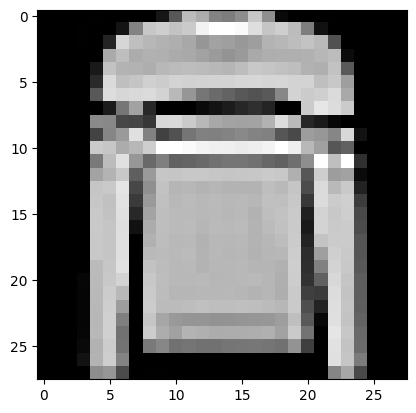

In [31]:
plt.figure()
plt.imshow(train_images[5], cmap= 'gray')
plt.show()

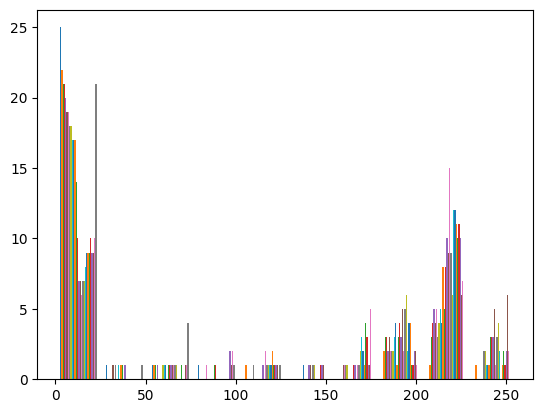

In [32]:
_ = plt.hist(train_images[0])

In [33]:
train_images = train_images/255.0
test_images = test_images/255.0

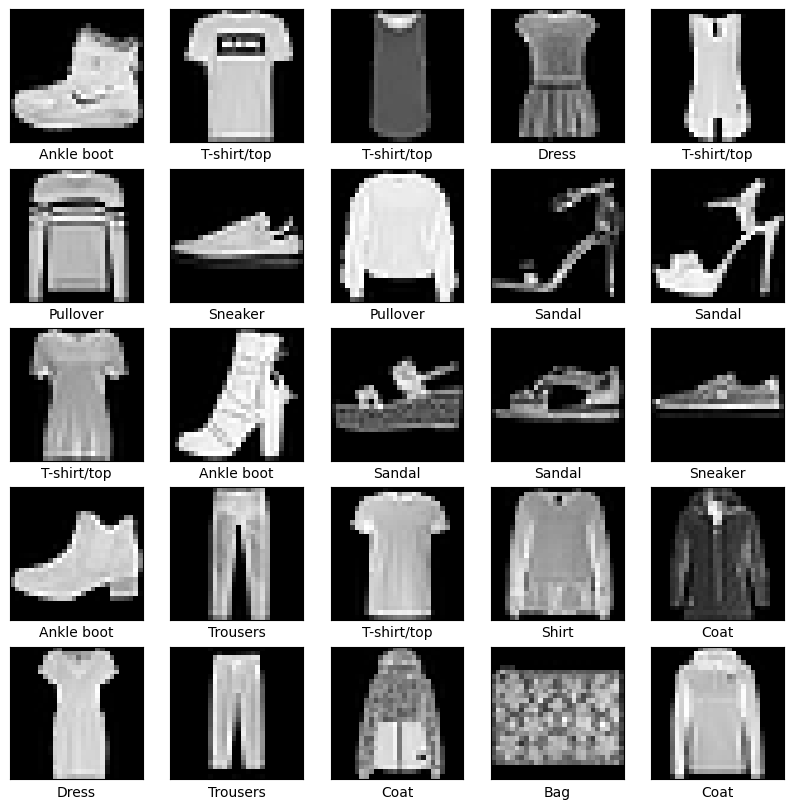

In [34]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i+1)  ##ovo namesta da ne budu sve jedna preko druge i kaze koliko slika ce biti u redovima i kolonama
    plt.xticks([])  ## ova dva su da nam uklone ove skale sa strane znaci nebitni su
    plt.yticks([])
    plt.imshow(train_images[i], cmap = 'gray')
    plt.xlabel(class_names[train_labels[i]])  ##ovo je za nazive odece
plt.show()

# Kreiranje modela

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [51]:
train_labels
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

In [52]:
model.compile(optimizer = 'adam', loss = tf.losses.CategoricalCrossentropy() , metrics = ['accuracy'])

In [54]:
model = model.fit(train_images, train_labels_cat, epochs = 15)

2023-06-26 23:27:47.198155: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3563 - accuracy: 0.8712
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3259 - accuracy: 0.8818
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3064 - accuracy: 0.8881
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.8936
Epoch 5/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2783 - accuracy: 0.8965
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2661 - accuracy: 0.9009
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2552 - accuracy: 0.9047
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2481 - accuracy: 0.9074
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2380 - accuracy: 0.9112
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.230

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
test_loss, test_acc

AttributeError: 'History' object has no attribute 'evaluate'

Text(0, 0.5, 'accuracy')

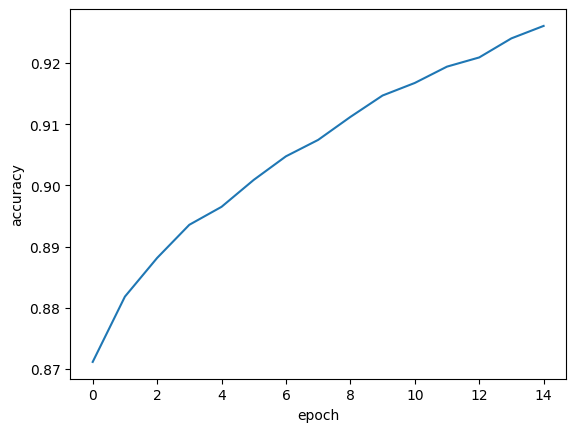

In [57]:
plt.plot(model.history['accuracy'], label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')